In [1]:
using Random, Printf, Colors

---

## Luxor

In [2]:
import Luxor
const lx = Luxor

Luxor

In [3]:
function triangle(points, degree)
    lx.sethue(cols[degree])
    lx.poly(points, :fill)
end

function sierpinski(points, degree)
    triangle(points, degree)
    if degree > 1
        p1, p2, p3 = points
        sierpinski([p1, lx.midpoint(p1, p2),
                        lx.midpoint(p1, p3)], degree-1)
        sierpinski([p2, lx.midpoint(p1, p2),
                        lx.midpoint(p2, p3)], degree-1)
        sierpinski([p3, lx.midpoint(p3, p2),
                        lx.midpoint(p1, p3)], degree-1)
    end
end

function draw(n)
    lx.circle(lx.O, 100, :clip)
    points = lx.ngon(lx.O, 150, 3, -pi/2, vertices=true)
    sierpinski(points, n)
end

draw (generic function with 1 method)

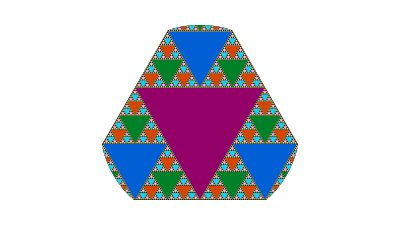

In [4]:
lx.Drawing(400, 250)
lx.background("white")
lx.origin()

depth = 8 
cols = distinguishable_colors(depth) # from Colors.jl
draw(depth)

lx.finish()
lx.preview()

---

## Winston

In [2]:
import Winston
const wn = Winston

Winston

In [84]:
t = collect(range(0,stop=4pi,length=1000));
f(x::Array) = 10x .* exp.(-0.3x) .* sin.(3x);
g(x::Array) = 0.1x.*(2pi .- x).*(4pi .- x);
h(x::Array) = 10.0 ./ (1 .+ x.*x);  # Note need spaces tp clarify 1./ and 1 ./

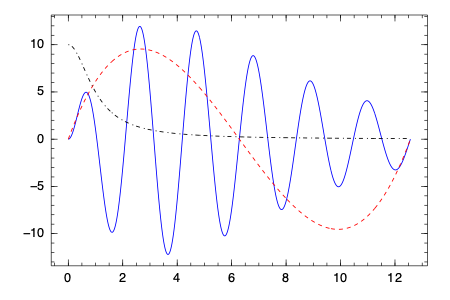

In [85]:
y1 = f(t) 
y2 = g(t)
y3 = h(t)
wn.plot(t,y1,"b",t,y2,"r--",t,y3,"k;")

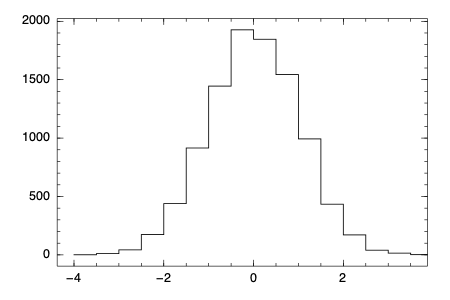

In [68]:
x = randn(10000)
wn.plothist(x, nbins=50)

In [148]:
p = wn.FramedPlot( title="Frequency vs Time", ylabel="\\Theta",xlabel="\\Tau");
wn.add(p,wn.FillBetween(t,y1,t,y2));
wn.add(p,wn.Curve(t,y1,color="red"));
wn.add(p,wn.Curve(t,y2,color="blue"));

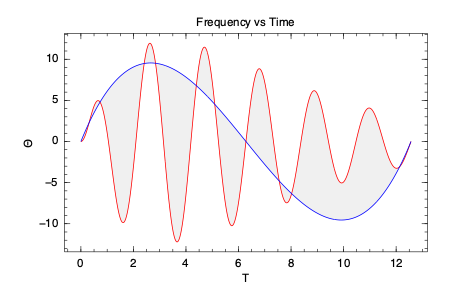

In [149]:
wn.display(p)

---

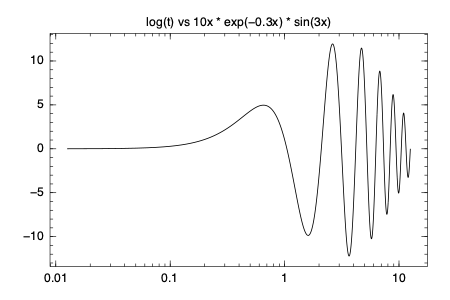

In [86]:
wn.semilogx(t,y1)
wn.title("log(t) vs 10x * exp(-0.3x) * sin(3x)")

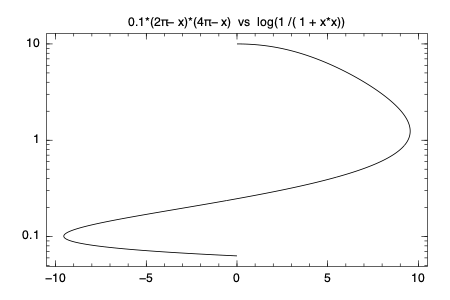

In [87]:
wn.semilogy(y2,y3)
wn.title("0.1*(2\\pi - x)*(4\\pi - x)  vs  log(1 /( 1 + x*x))")

---

In [159]:
p = wn.FramedPlot(aspect_ratio=1,xrange=(-10,110),yrange=(-10,110));
n = 21;
x = collect(range(0.0, length=n, stop=100.0));

# Create a set of random variates

yA =  10.0*randn(n) .+ 40.0;
yB =  x .+ 5.0*randn(n);

In [160]:
# Set labels and symbol styles

a = wn.Points(x, yA, kind="circle");
wn.setattr(a,label="'a' points");

b = wn.Points(x, yB);
wn.setattr(b,label="'b' points");
wn.style(b, kind="filled circle");

# Plot a line which 'fits' through the yB points
# and add a legend in the top LHS part of the graph

s = wn.Slope(1, (0,0), kind="dotted");
wn.setattr(s, label="slope");
lg = wn.Legend(.1, .9, Any[a,b,s] );
wn.add(p, s, a, b, lg);

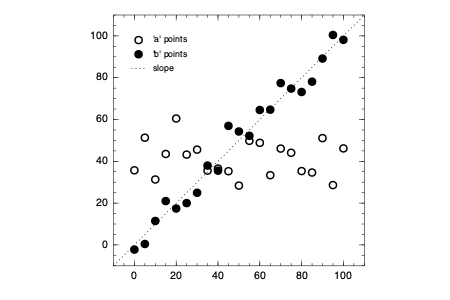

In [161]:
wn.display(p)

In [163]:
wn.savefig(p, "MyWPlot.png") 

### Cairo

In [150]:
import Cairo
const ca = Cairo

Cairo

In [151]:
c  = ca.CairoRGBSurface(512, 128);
cr = ca.CairoContext(c);
ca.save(cr);

ca.set_source_rgb(cr, 0.8, 0.8, 0.8);
ca.rectangle(cr, 0.0, 0.0, 512.0, 128.0); # background
ca.fill(cr);
ca.restore(cr);
ca.save(cr);

In [153]:
x0=51.2;  y0=64.0;
x1=204.8; y1=115.4;
x2=307.2; y2=12.8;
x3=460.8; y3=64.0;

ca.move_to(cr, x0, y0);
ca.curve_to(cr, x1, y1, x2, y2, x3, y3);
ca.set_line_width(cr, 10.0);
ca.stroke(cr);
ca.restore(cr);

In [154]:
ca.move_to(cr, 12.0, 12.0);
ca.set_source_rgb(cr, 0, 0, 0);
ca.show_text(cr,"Cairo Curve")
ca.write_to_png(c,"cstroke.png");

In [156]:
run(`display cstroke.png`)

Process(`display cstroke.png`, ProcessExited(0))

---

## PyPlot

In [3]:
import PyPlot
const py = PyPlot

PyPlot

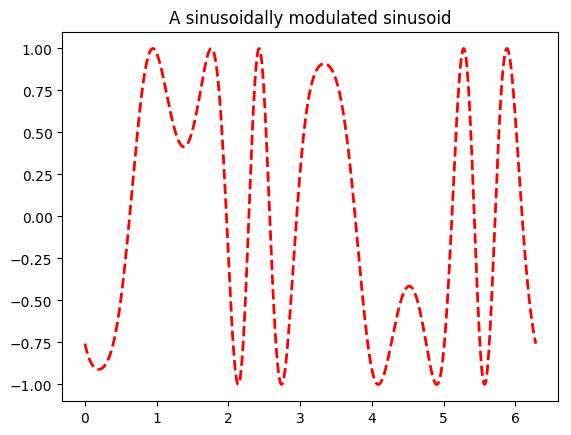

In [6]:
x = collect(range(0.0,stop=2pi,length=1000))
y = sin.(3*x + 4*cos.(2*x));
py.title("A sinusoidally modulated sinusoid");
py.plot(x, y, color="red", linewidth=2.0, linestyle="--");

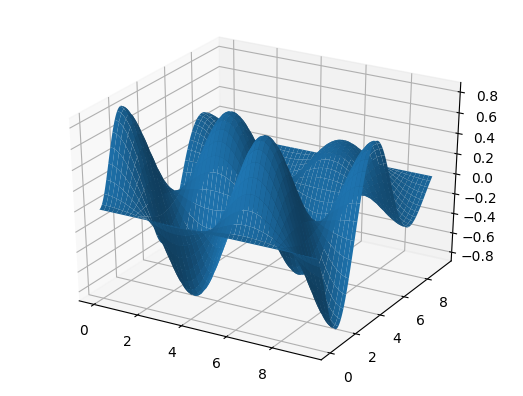

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x11f1179e8>

In [4]:
y = collect(range(0,stop=3π,length=250))
py.surf(y, y, y .* sin.(y) .* cos.(y)' .* exp.(-0.4y))

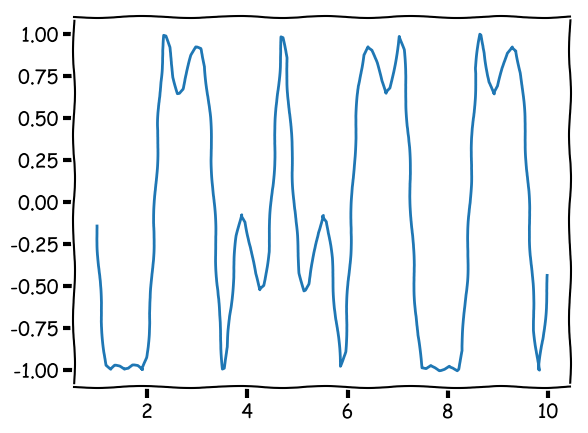

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12ce67518>

In [10]:
py.xkcd()
x = collect(range(1, length=101, stop=10));
y = sin.(3x + cos.(5x))
p = py.plot(x,y)

---

## Gadfly

In [164]:
import Gadfly
gd = Gadfly

Gadfly

In [167]:
dd  =  gd.plot(x =  rand(10),  y = rand(10));
gd.draw(SVG("random-pts.svg",  15cm, 12cm) , dd);

UndefVarError: UndefVarError: cm not defined

In [71]:
x = collect(1:100);
y1 = ones(100) - 2*rand(100);
y2 = randn(100);

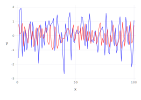

In [72]:
gd.plot(
 gd.layer(x=x,y=y1,gd.Geom.line,gd.Theme(default_color=gd.colorant"red")),
 gd.layer(x=x,y=y2,gd.Geom.line,gd.Theme(default_color=gd.colorant"blue"))
)

In [90]:
using RDatasets, DataFrames;

mlmf = dataset("mlmRev","Gcsemv")
df = mlmf[completecases(mlmf), :]

,School,Student,Gender,Written,Course
,Categorical…,Categorical…,Categorical…,Float64⍰,Float64⍰
1,20920,27,F,39.0,76.8
2,20920,31,F,36.0,87.9
3,20920,42,M,16.0,44.4
4,20920,101,F,49.0,89.8
5,20920,113,M,25.0,17.5
6,22520,1,F,48.0,84.2
7,22520,7,M,46.0,66.6
8,22520,9,F,28.0,47.2
9,22520,15,F,43.0,80.5


In [91]:
names(df)

5-element Array{Symbol,1}:
 :School 
 :Student
 :Gender 
 :Written
 :Course 

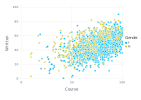

In [93]:
# gd.set_default_plot_size(20cm, 12cm);
gd.plot(df, x="Course", y="Written", color="Gender")

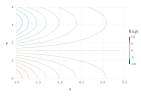

In [121]:
gd.plot((x,y) -> exp.(-x) .* cos.(y), -2, 0.4, 0, 4)

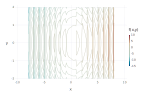

In [143]:
gd.plot((x,y) -> x .* exp.(-(x - floor.(x))).^2 .- y.^2, -8.0, 8, -2.0, 2.0)

---

In [170]:
import Compose
const cm =  Compose 

Compose

In [171]:

function sierpinski(n)
  if n == 0
    cm.compose(cm.context(), cm.polygon([(1,1), (0,1), (1/2, 0)]));
  else
    t = sierpinski(n - 1);
    cm.compose(cm.context(), (cm.context( 1/4, 0, 1/2, 1/2), t),
                             (cm.context( 0, 1/2, 1/2, 1/2), t),
                             (cm.context( 1/2, 1/2, 1/2, 1/2), t));
  end
end


sierpinski (generic function with 1 method)

In [172]:
cx1 = compose(sierpinski(1), linewidth(0.2mm),fill(nothing), stroke("black"));
img = SVG("sierp1.svg", 10cm, 8.66cm); draw(img,cx1);

cx3 = compose(sierpinski(3), linewidth(0.2mm),fill(nothing), stroke("black"));
img = SVG("sierp3.svg", 10cm, 8.66cm); draw(img,cx3);

cx5 = compose(sierpinski(5), linewidth(0.2mm),fill(nothing), stroke("black"));
img = SVG("sierp5.svg", 10cm, 8.66cm); draw(img,cx5);


MethodError: MethodError: no method matching *(::Int64, ::Module)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  *(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:54
  *(::Union{Int16, Int32, Int64, Int8}, !Matched::BigInt) at gmp.jl:463
  ...

## PGFPlots

In [1]:
using PGFPlots

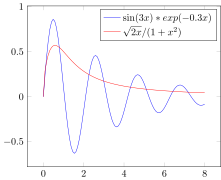

In [7]:
p = Axis( [ Plots.Linear(x -> sin.(3x) .* exp.(-0.3x), (0,8),
                         legendentry = L"$\sin(3x)*exp(-0.3x)$"),
            Plots.Linear(x -> sqrt.(x) ./ (1+x.^2), (0,8),
                         legendentry = L"$\sqrt{2x}/(1+x^2)$") 
        ])

In [4]:
# This requires installation of the pdf2svg utility
save("linear-plots.svg", p);

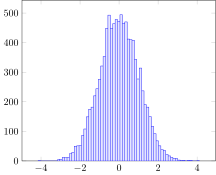

In [6]:
fq  =  randn(10000);
p = Axis(Plots.Histogram(fq, bins=100), ymin=0)

In [8]:
save("histogram-plot.svg", p);